In [1]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
! pip3 install install semantic-kernel==0.3.14.dev0


StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 3, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.8/191.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 167.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 134.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 156.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

# Import the semantic kernel
## Load the OpenAI Azure Chat Completion

In [2]:
import semantic_kernel as sk
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion
kernel = sk.Kernel()

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 4, Finished, Available)

# Add Your OpenAI Model Info

In [ ]:
deployment = 'Your Azure OpenAI Service GPT-4 model deployment name'
api_key = 'Your Azure OpenAI Service API Key'
endpoint = 'Your Azure OpenAI Service Endpoint'

# Model 1 ChatGPT 3.5 Turbo

In [3]:
deployment = ''
endpoint = ''
api_key = ''
service_id = deployment

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 5, Finished, Available)

# Model 2 ChatGPT 3.5 Turbo 16K

In [10]:
deployment = ''
endpoint = ''
api_key = ''
service_id = deployment

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 12, Finished, Available)

In [11]:
kernel.add_chat_service("chat", AzureChatCompletion(deployment, endpoint, api_key))


StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 13, Finished, Available)

# Point to our base skills directory

In [12]:
base_skills_directory = '/lakehouse/default/Files/skills'

skills = {
**kernel.import_semantic_skill_from_directory(base_skills_directory , "dataskill"),
}



csv_skill = skills["csv"]
pysql_skill = skills["spark"]
#not part of the original blog code
sql_skill = skills["sql"]



StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 14, Finished, Available)

# Load Product List into pandas data frame

In [13]:
import pandas as pd
df = pd.read_csv("/lakehouse/default/" + "Files/datasets/ProductList.csv")
display(df)


StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 15, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


SynapseWidget(Synapse.DataFrame, 406822c6-5414-4a8e-bb2b-693934d0141e)

# Can we create a visualization with no code?

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 16, Finished, Available)

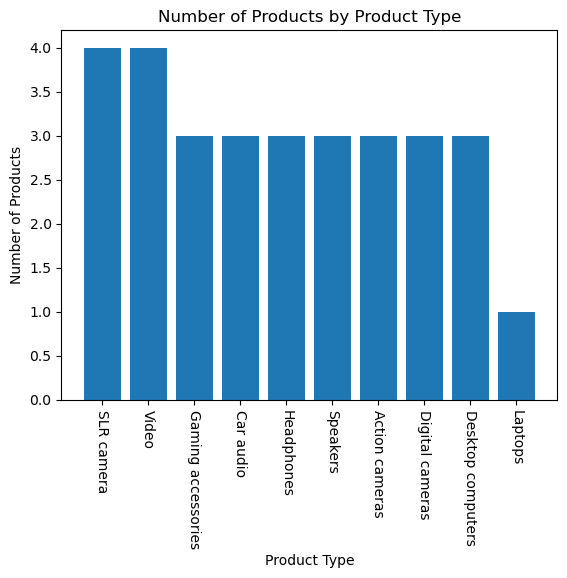

In [14]:
panda_context_variables = sk.ContextVariables(variables={
"question": "Generate a bar chart to list Product Type and display the number of products owned by the corresponding Product Type"
})
panda_result = await csv_skill.invoke_async(variables=panda_context_variables )
pandasql = panda_result .result.replace("\\n","").replace("\\n\\n", "")
exec(pandasql)
#print(panda_result)

# How did it work?
# -
# -
# -
# -
# Try again with ChatGPT 3.5 turbo 16K
# 
# Now we try to create a table!

In [15]:
context_variables = sk.ContextVariables(variables={
"question": "Find Product Type belonging to Car audio and display them as table "
})
result = await csv_skill.invoke_async(variables=context_variables)
sql = result.result.replace("\\n","").replace("\\n\\n", "")
exec(result.result)

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 17, Finished, Available)

             Title   Code Name Product Line Product Type         Color  Notes
3   Car Audio 1000  CARAud1000        Audio    Car audio  Chrome/Black    NaN
12  Car Audio 2000  CARAud2000        Audio    Car audio  Chrome/Black    NaN
19  Car Audio 2500  CARAud2500        Audio    Car audio  Chrome/Black    NaN


# Switch over to Spark and load our sales data

In [16]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
df = spark.read.format("csv").option("header","true").load("Files/datasets/sales.csv")

df.show(n=5)

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 18, Finished, Available)

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+---------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|        EmailAddress|                Item|Quantity|UnitPrice|TaxAmount|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+---------+
|         SO43701|                   1|2019-07-01|   Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99| 271.9992|
|         SO43704|                   1|2019-07-01|    Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99| 269.9992|
|         SO43705|                   1|2019-07-01|     Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99| 271.9992|
|         SO43700|                   1|2019-07-01|  Ruben Prasad|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982|  55.9279|
|         SO43703|                   1|20

# Can we create a query against our data frame?

In [17]:
sparksql_context_variables = sk.ContextVariables(variables={
"question": "Search OrderDate on '2019-07-01' and counts SalesOrderLineNumber"
})
sparksql_result = await pysql_skill.invoke_async(variables=sparksql_context_variables )
sparksql = sparksql_result .result.replace("\n","")
#exec(sparksql)
print(sparksql)

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 19, Finished, Available)

SELECT OrderDate, COUNT(SalesOrderLineNumber) FROM df WHERE OrderDate = '2019-07-01' GROUP BY OrderDate;


In [18]:
df.createOrReplaceTempView("temp_table");
result = spark.sql("SELECT OrderDate, COUNT(SalesOrderLineNumber) AS count FROM temp_table WHERE OrderDate = '2019-07-01' GROUP BY OrderDate");
result.show();

StatementMeta(, 8c018403-e62f-4386-8b8b-5204a10a66e5, 20, Finished, Available)

+----------+-----+
| OrderDate|count|
+----------+-----+
|2019-07-01|    9|
+----------+-----+

